# Proyek Analisis Data: Bike Sharing Dataset

---


- **Nama:** Bahiskara Ananda Arryanto
- **Email:** kyrozepto@gmail.com
- **ID Dicoding:** kyrozepto

## Menentukan Pertanyaan Bisnis

- Pada jam-jam berapa yang menjadi puncak penyewaan sepeda sepanjang tahun?
- Bagaimana korelasi dan perbandingan penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana cuaca memengaruhi perilaku penyewaan sepeda untuk pengguna yang tidak terdaftar dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [12]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

- Hasil df.info() menunjukkan bahwa kolom dteday di kedua dataframe masih bertipe data object, yang seharusnya adalah datetime. Hal ini akan kita perbaiki di tahap cleaning data nantinya.

Cek missing value dan duplikasi dalam dataset,

In [15]:
print("Missing value dalam day_df:\n",day_df.isna().sum())
print("Total duplicated data dalam day_df: ",day_df.duplicated().sum())
print("\nMissing value dalam hour_df:\n" ,hour_df.isna().sum())
print("Total duplicated data dalam hour_df: " ,hour_df.duplicated().sum())

Missing value dalam day_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Total duplicated data dalam day_df:  0

Missing value dalam hour_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Total duplicated data dalam hour_df:  0


- Tidak ditemukan adanya missing value dan duplikasi.

### Cleaning Data

Kolom dteday pada kedua dataframe perlu diubah menjadi tipe data datetime menggunakan pd.to_datetime() untuk memungkinkan analisis berdasarkan waktu.

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [20]:
day_df.to_csv("dashboard/main_data.csv", index=False)

In [21]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


- Kolom 'dteday' telah kita ubah menjadi tipe data datetime.
- Data mencakup periode dari 1 Januari 2011 hingga 31 Desember 2012 (2 tahun penuh).
- Nilai season dari 1 hingga 4 yang mewakili 4 musim dalam setahun.
- Nilai yr 0 dan 1 yang mewakili tahun 2011 dan 2012.

## Exploratory Data Analysis (EDA)

### Explore jam-jam penyewaan sepeda

Untuk menemukan puncak penyewaan sepeda sepanjang tahun 2011 dan 2012, data dari DataFrame hour_df perlu dipisahkan berdasarkan tahun penyewaan. Di mana nilai 0 menunjukkan tahun 2011 dan nilai 1 menunjukkan tahun 2012.

In [26]:
df_2011 = hour_df[hour_df['yr'] == 0]
df_2012 = hour_df[hour_df['yr'] == 1]
hourly_df_2011 = df_2011.groupby('hr')['cnt']
hourly_df_2012 = df_2012.groupby('hr')['cnt']

In [27]:
hourly_df_2011.describe()

,count,mean,std,min,25%,50%,75%,max
hr,,,,,,,,
0,361.0,43.047091,33.972710,2.0,19.00,32.0,53.00,177.0
1,360.0,26.550000,26.423859,1.0,10.00,16.0,31.00,124.0
2,352.0,18.923295,21.802593,1.0,5.00,10.0,22.00,106.0
3,342.0,10.061404,11.399916,1.0,3.00,5.5,11.00,59.0
4,337.0,5.391691,3.412293,1.0,3.00,5.0,7.00,23.0
5,353.0,14.609065,9.463454,1.0,6.00,13.0,23.00,39.0
6,361.0,57.620499,41.597843,1.0,19.00,47.0,99.00,145.0
7,363.0,156.831956,117.798695,1.0,42.50,121.0,272.00,370.0
8,363.0,262.994490,161.243202,5.0,100.00,256.0,417.00,564.0


In [28]:
hourly_df_2012.describe()

,count,mean,std,min,25%,50%,75%,max
hr,,,,,,,,
0,365.0,64.630137,46.812787,3.0,32.00,49.0,88.00,283.0
1,364.0,40.126374,38.183340,2.0,13.00,24.0,54.25,168.0
2,363.0,26.696970,30.043186,1.0,6.00,13.0,39.00,132.0
3,355.0,13.332394,14.634220,1.0,4.00,7.0,18.00,79.0
4,360.0,7.252778,4.551163,1.0,4.00,7.0,10.00,28.0
5,364.0,25.010989,14.263938,1.0,12.00,24.5,37.00,66.0
6,364.0,94.315934,60.526311,1.0,30.75,100.5,144.00,213.0
7,364.0,267.145604,179.431804,6.0,71.00,288.5,420.25,596.0
8,364.0,454.763736,257.463082,11.0,161.50,558.0,673.25,839.0


- Tabel yang sudah dipisahkan berdasarkan tahun dapat digunakan untuk membandingkan statistik untuk setiap jam di tahun 2011 dan 2012 untuk mengetahui jam-jam dengan rata-rata penyewaan sepeda tertinggi, jam sibuk dengan standar deviasi tinggi, dll.

### Explore penyewaan pada tiap musim dan kondisi cuaca

Kita dapat menemukan perbandingan penyewaan antara musim dengan mengelompokkan data penyewaan sepeda berdasarkan dua variabel, musim (season) dan kondisi cuaca (weathersit). Dengan begitu kita dapat mengukur bagaimana kondisi cuaca tertentu dapat memengaruhi jumlah penyewaan sepeda.


Value dari weathersit merepresentasikan kondisi cuaca sebagai berikut:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [33]:
season_cnt = hour_df.groupby(by=['season', 'weathersit'])['cnt']
season_cnt.describe()

count        mean         std   min    25%    50%     75%  \
season weathersit                                                               
1      1           2665.0  122.055535  127.384258   1.0  28.00   86.0  175.00   
       2           1205.0  103.074689  106.154745   1.0  23.00   73.0  147.00   
       3            369.0   58.650407   74.793446   1.0  11.00   35.0   75.00   
       4              3.0   74.333333   77.925178  23.0  29.50   36.0  100.00   
2      1           2859.0  232.410983  198.312457   1.0  59.00  192.0  350.00   
       2           1144.0  181.261364  164.832349   1.0  44.00  143.0  264.00   
       3            406.0  115.179803  130.760396   1.0  21.25   67.5  164.75   
3      1           3280.0  244.494207  201.732720   1.0  71.75  210.0  357.00   
       2            947.0  224.848997  185.406665   2.0  72.50  188.0  329.00   
       3            269.0  171.955390  175.871513   1.0  39.00  121.0  237.00   
4      1           2609.0  209.463779  190.891851   1.0  49.00  168.0  309.00   
       2           1248.0  201.483974  173.833617   1.0  60.75  167.0  300.00   
       3            375.0  116.453333  127.471365   1.0  30.50   76.0  155.00   

                     max  
season weathersit         
1      1           801.0  
       2           712.0  
       3           520.0  
       4           164.0  
2      1           873.0  
       2           957.0  
       3           782.0  
3      1           977.0  
       2           868.0  
       3           891.0  
4      1           967.0  
       2           905.0  
       3           856.0

### Explore korelasi jumlah penyewaan dengan variabel lain dalam dataset

In [35]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


 - Korelasi positif yang sangat kuat antara registered dan cnt (-0.068348), menunjukkan bahwa jumlah pengguna terdaftar menjadi prediktor yang sangat baik untuk total jumlah penyewaan sepeda.
 - Korelasi positif yang cukup kuat antara casual dan cnt (-0.068348), menunjukkan bahwa jumlah penyewa sepeda casual juga berkontribusi signifikan terhadap total jumlah penyewaan.
 - Korelasi negatif yang lemah antara holiday dan cnt (-0.068348), menunjukkan bahwa hari libur memiliki pengaruh kecil terhadap penurunan jumlah penyewaan sepeda.

Kita juga dapat membuat korelasi heatmap untuk memudahkan visualisasi hubungan antara variabel-variabel tersebut,

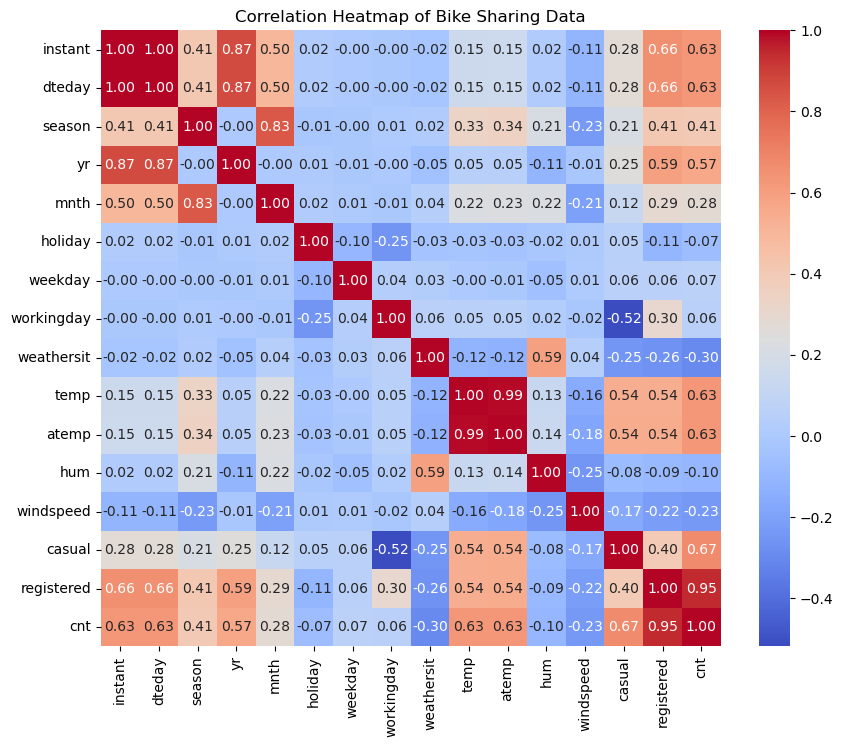

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Bike Sharing Data')
plt.show()

- Gradasi warna dari biru ke merah pada diagram heatmap menunjukkan kekuatan korelasi

### Explore lebih lanjut pola penyewaan dengan kondisi cuaca

Selanjutnya, kita dapat menggunakan scatterplot pada hour_df untuk mengukur korelasi antara kondisi cuaca, yaitu variabel 'temp', 'atemp', 'hum', dan 'windspeed'. Dengan menggunakan scatterplot, kita dapat memvisualisasikan hubungan antar variabel secara langsung dan memungkinkan kita mengidentifikasi pola dalam data.

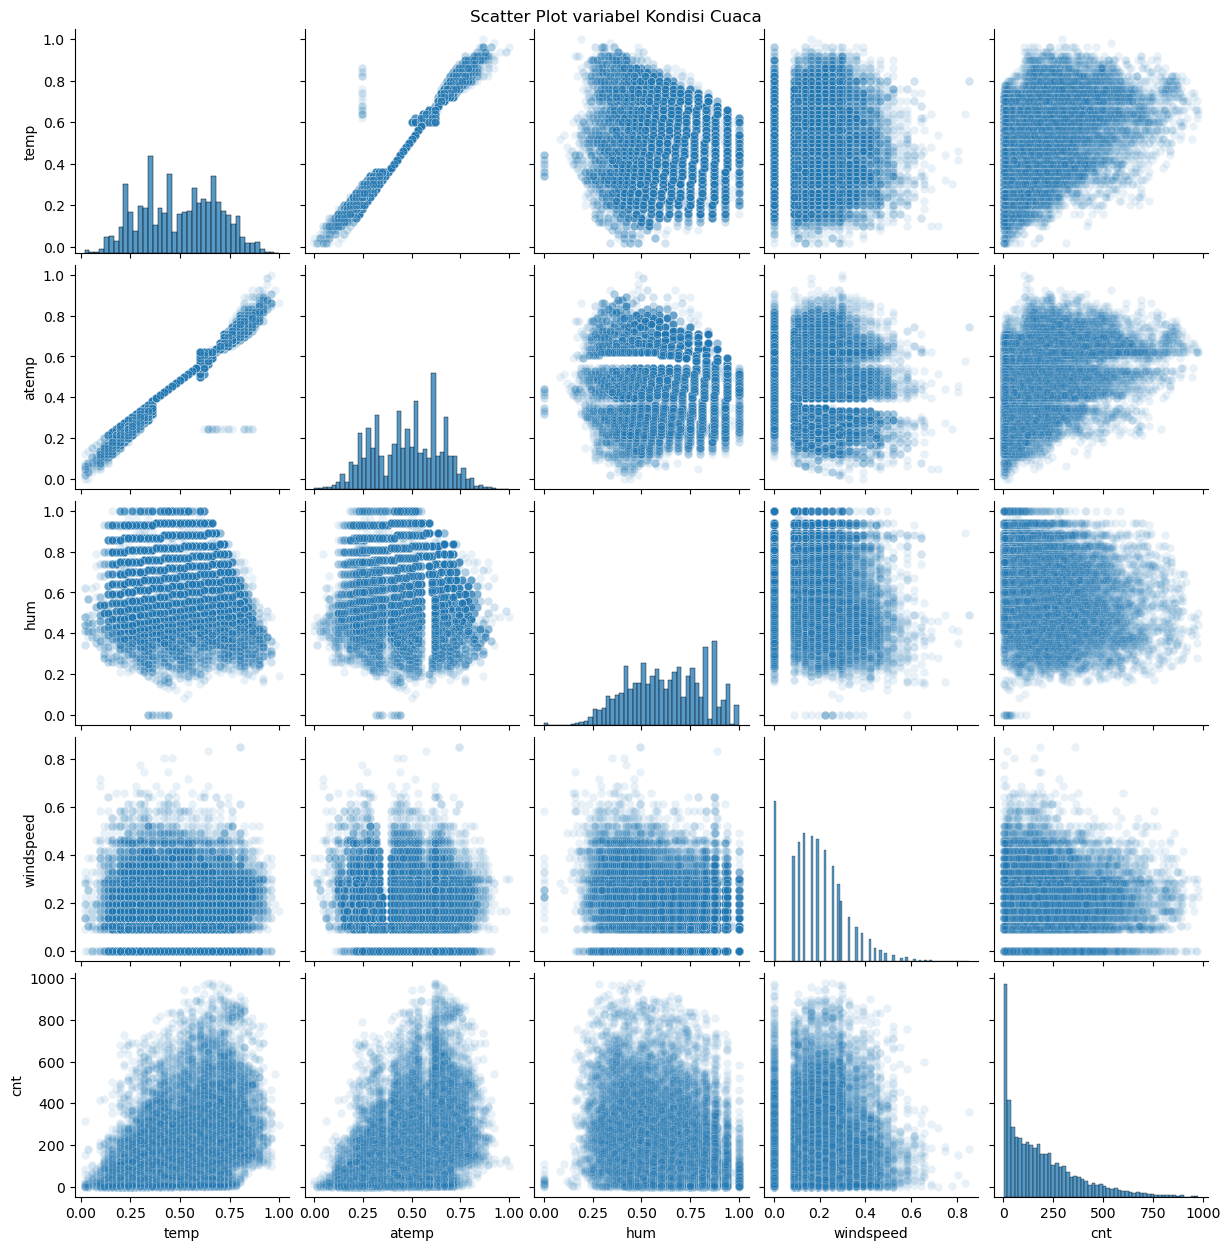

In [42]:
sns.pairplot(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], kind='scatter', plot_kws={'alpha':0.1})
plt.suptitle('Scatter Plot variabel Kondisi Cuaca', y=1)
plt.show()

- Korelasi yang sangat kuat antara temperatur dengan jumlah sepeda yang disewa (Semakin tinggi suhu, semakin banyak sepeda yang disewa).
- Korelasi yang mirip antara temp dan atemp, karena temp dan atemp pada dasarnya mengukur hal yang hampir sama dalam dataset ini.
- Ada sedikit kecenderungan jumlah penyewaan yang menurun pada tingkat kecepatan angin yang sangat tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam-jam berapa yang menjadi puncak penyewaan sepeda sepanjang tahun?

Untuk menemukan puncak penyewaan sepeda sepanjang tahun 2011 dan 2012, sebelumnya data dari dataframe hour_df sudah kita pisahkan berdasarkan tahun penyewaan. Di mana nilai 0 menunjukkan tahun 2011 dan nilai 1 menunjukkan tahun 2012. Selanjutnya, kita dapat membuat diagram bar menggunakan dataframe hourly_df yang telah kita buat untuk menggambarkan rata-rata penyewaan sepeda per jam.

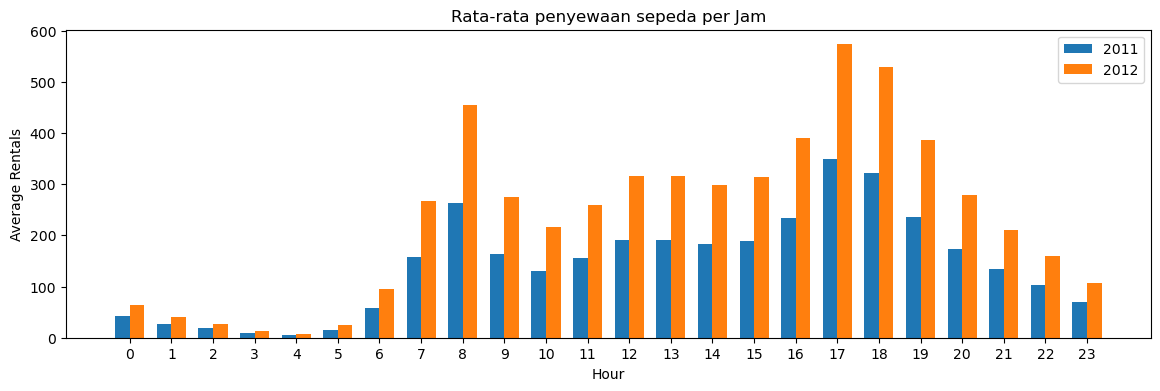

In [47]:
hourly_average_2011 = hourly_df_2011.mean()
hourly_average_2012 = hourly_df_2012.mean()

plt.figure(figsize=(14, 4)) 
index = range(24)
bar_width = 0.35
plt.bar(index, hourly_average_2011, bar_width, label='2011')
plt.bar([i + bar_width for i in index], hourly_average_2012, bar_width, label='2012')
plt.title('Rata-rata penyewaan sepeda per Jam')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.xticks([i + bar_width/2 for i in index], index)

plt.legend()
plt.show()

- Terlihat puncak penyewaan sepeda sepanjang tahun 2011 dan 2012 adalah sekitar jam 5-6 sore hari.
- Ada pola lonjakan penyewaan sekitar jam 7-9 pagi, kemungkinan besar berkaitan dengan waktu berangkat kerja atau sekolah.
- Pola lonjakan yang lebih besar terjadi sekitar jam 4-7 sore, saat orang pulang dari kerja atau aktivitas lainnya.
- Penyewaan sepeda yang paling rendah terjadi antara jam 0-5 dini hari.

### Pertanyaan 2: Bagaimana korelasi dan perbandingan penyewaan sepeda antara hari kerja dan akhir pekan?

Untuk menemukan korelasi antara penyewaan sepeda, hari kerja, dan akhir pekan, kita dapat membuat heatmap dan bar diagram dengan menggunakan variabel cnt dan weekday. Sebelum itu, perlu memeriksa variabel kategorik weekday untuk menentukan apakah hari tersebut merupakan hari kerja atau akhir pekan, dengan memberikan nilai 1 untuk akhir pekan dan 0 untuk hari kerja. Dengan cara ini, kita dapat memperoleh nilai untuk cnt berdasarkan kategori akhir pekan dan hari kerja.

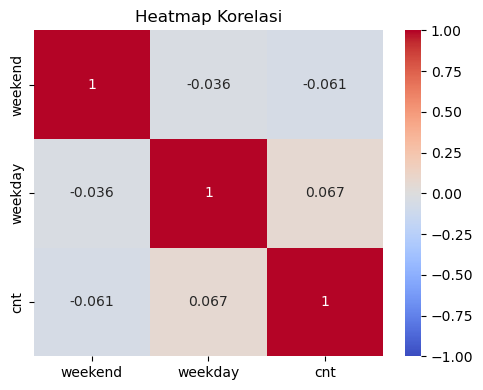

In [51]:
day_df['weekend'] = day_df['workingday'].apply(lambda x: 0 if x == 1 else 1)
avg_rentals = day_df.groupby('weekend')['cnt'].mean()
heatmap = day_df[['weekend', 'weekday', 'cnt']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi')
plt.tight_layout()
plt.show()

- Perbedaan pola penyewaan antara hari kerja dan akhir pekan sangat kecil berdasarkan korelasi ini. Sehingga faktor hari kerja atau akhir pekan bukan penentu utama jumlah penyewaan sepeda.

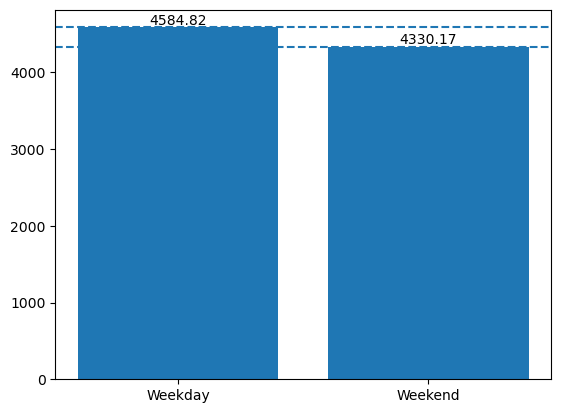

In [53]:
weekday_average = day_df[day_df['workingday'] == 1]['cnt'].mean()
weekend_average = day_df[day_df['workingday'] == 0]['cnt'].mean()
categories = ['Weekday', 'Weekend']
values = [weekday_average, weekend_average]

fig, ax = plt.subplots()
bars = ax.bar(categories, values)
ax.axhline(y=weekday_average, linestyle='--')
ax.axhline(y=weekend_average, linestyle='--')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

In [54]:
if weekday_average != 0:
    difference = ((weekend_average - weekday_average) / weekday_average) * 100
else:
    difference = 0
    
print(f"Selisih persentase antara akhir pekan dan hari kerja: {difference:.2f}%")

Selisih persentase antara akhir pekan dan hari kerja: -5.55%


- Terlihat perbandingan penyewaan sepeda yang tidak terlalu besar, ada sedikit penurunan dalam jumlah penyewaan sepeda pada akhir pekan dibandingkan dengan hari kerja.
- Penurunan 5.55% pada akhir pekan mengindikasikan perbedaan dalam tujuan penggunaan sepeda. Pada hari kerja, sepeda mungkin lebih banyak digunakan untuk bekerja dan sekolah, sementara pada akhir pekan lebih untuk rekreasi.

### Pertanyaan 3: Bagaimana cuaca memengaruhi perilaku penyewaan sepeda untuk pengguna yang tidak terdaftar dan terdaftar?

Sebelumnya di tahap Exploratory Data Analysis kita telah mencari koefisien korelasi dari dataset bike sharing untuk menemukan hubungan dari variabel-variabel cuaca terhadap perilaku penyewaan sepeda. 
Hasilnya ditemukan:

- Pengaruh kuat antara temperatur dengan total penyewaan sepeda (0.627494)
- Kecenderungan yang relatif lemah antara kecepatan angin dengan total penyewaan sepeda (-0.234545)
- Kecenderungan lainnya pada weathersit / kondisi cuaca tertentu sebesar (-0.297391)

Selanjutnya kita dapat membuat Scatter plot diagram dengan garis regresi untuk menunjukkan pengaruh cuaca dari tiap grup pengguna terhadap penyewaan sepeda,

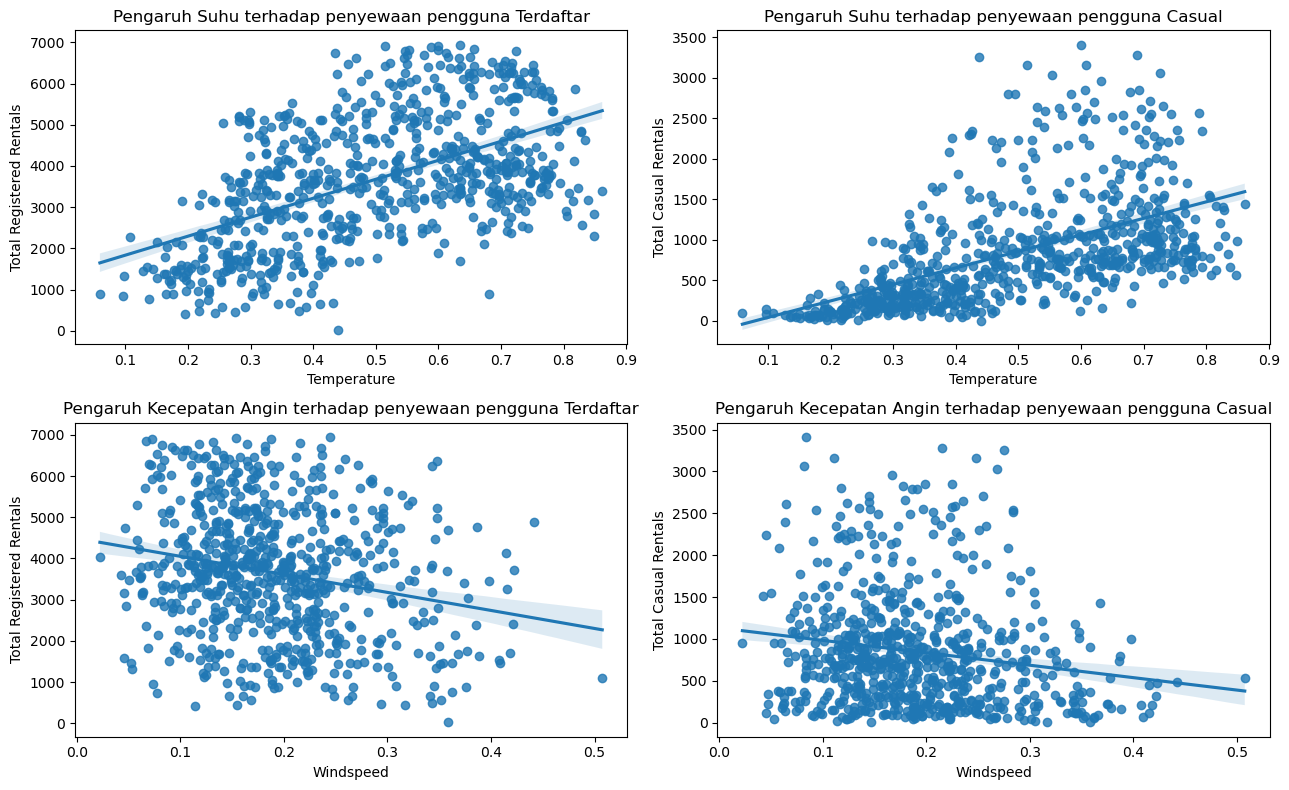

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(13, 8))
sns.regplot(x=day_df["temp"], y=day_df["registered"], ax=axs[0, 0])
axs[0, 0].set_title("Pengaruh Suhu terhadap penyewaan pengguna Terdaftar")
axs[0, 0].set_xlabel("Temperature")
axs[0, 0].set_ylabel("Total Registered Rentals")
sns.regplot(x=day_df["temp"], y=day_df["casual"], ax=axs[0, 1])
axs[0, 1].set_title("Pengaruh Suhu terhadap penyewaan pengguna Casual")
axs[0, 1].set_xlabel("Temperature")
axs[0, 1].set_ylabel("Total Casual Rentals")
sns.regplot(x=day_df["windspeed"], y=day_df["registered"], ax=axs[1, 0])
axs[1, 0].set_title("Pengaruh Kecepatan Angin terhadap penyewaan pengguna Terdaftar")
axs[1, 0].set_xlabel("Windspeed")
axs[1, 0].set_ylabel("Total Registered Rentals")
sns.regplot(x=day_df["windspeed"], y=day_df["casual"], ax=axs[1, 1])
axs[1, 1].set_title("Pengaruh Kecepatan Angin terhadap penyewaan pengguna Casual")
axs[1, 1].set_xlabel("Windspeed")
axs[1, 1].set_ylabel("Total Casual Rentals")

plt.tight_layout()
plt.show()

- Terlihat bahwa suhu memiliki pengaruh positif yang kuat terhadap jumlah penyewaan sepeda, baik untuk pengguna terdaftar (registered) maupun pengguna tidak terdaftar (casual). Pengaruhnya lebih kuat pada pengguna tidak terdaftar, mengindikasikan bahwa mereka lebih spontan dalam menyewa sepeda saat cuaca baik.
- Kecepatan angin memiliki pengaruh negatif yang relatif lemah terhadap jumlah penyewaan sepeda baik untuk pengguna terdaftar maupun tidak terdaftar. Garis regresi menunjukkan sedikit penurunan dalam penyewaan sepeda ketika kecepatan angin meningkat, yang artinya pengguna cenderung sedikit mengurangi aktivitas penyewaan sepeda saat kecepatan angin meningkat.

Kita juga dapat melihat hubungan perilaku penyewaan berdasarkan musim dan kondisi cuaca tertentu dengan menggabungkan season dan weathersit seperti berikut,

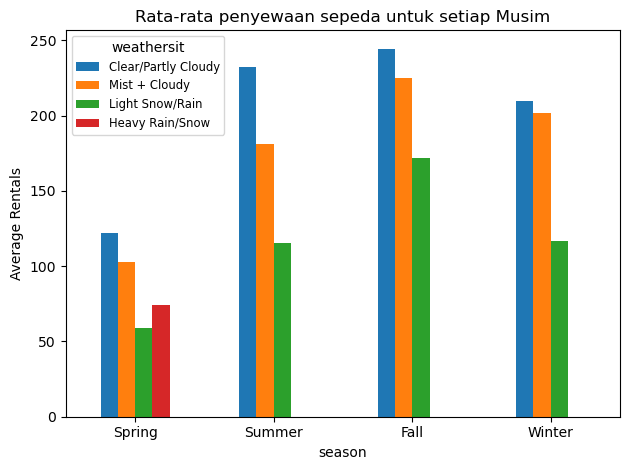

In [61]:
average_season_cnt = season_cnt.mean().unstack()
weathersit_labels = {
    1: "Clear/Partly Cloudy",
    2: "Mist + Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

ax = average_season_cnt.plot(kind='bar')
plt.title('Rata-rata penyewaan sepeda untuk setiap Musim')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
ax.set_xticklabels([season_labels.get(x+1) for x in ax.get_xticks()])
handles, labels = ax.get_legend_handles_labels()
new_labels = [weathersit_labels.get(int(l), l) for l in labels]
ax.legend(handles, new_labels, title='weathersit', fontsize='small')

plt.tight_layout()
plt.show()

- Cuaca cerah dan sebagian berawan menjadi kondisi yang paling ideal bagi pengguna untuk bersepeda pada setiap musimnya.
- Cuaca hujan atau salju secara signifikan mengurangi jumlah penyewaan sepeda, yang menunjukkan bahwa kondisi basah atau dingin cenderung mengurangi aktivitas pengguna untuk bersepeda.

## Conclusion

- Berdasarkan visualisasi hour_df menggunakan diagram bar, puncak penyewaan sepeda terjadi pada jam 7-8 pagi dan 5-6 sore, baik pada tahun 2011 maupun 2012. Hal ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan komuter, yaitu perjalanan ke dan dari kantor pada hari kerja.
- Analisis day_df menunjukkan bahwa rata-rata penyewaan sepeda pada hari kerja lebih tinggi dibandingkan dengan akhir pekan. Terdapat penurunan sebesar 5.55% pada jumlah penyewaan sepeda di akhir pekan. Hal ini memperkuat kesimpulan bahwa sepeda lebih banyak digunakan untuk keperluan komuter. Selain itu, visualisasi data menunjukkan bahwa penyewaan sepeda pada hari libur lebih rendah daripada hari biasa, baik di tahun 2011 maupun 2012.
- Hasil analisis juga menunjukkan korelasi positif antara suhu (temp) dengan jumlah penyewaan sepeda (cnt). Hal ini berlaku baik untuk pengguna terdaftar (registered) maupun pengguna tidak terdaftar (casual). Namun, pengaruh suhu lebih kuat pada pengguna yang tidak terdaftar, mengindikasikan bahwa mereka lebih spontan dalam menyewa sepeda saat cuaca baik.
- Berdasarkan analisis hour_df, kondisi cuaca "Clear/Partly Cloudydy" memiliki rata-rata penyewaan sepeda tertinggi di semua musim. Sebaliknya, kondisi cuaca "Light Snow/Rain" memiliki rata-rata penyewaan sepeda terendah di semua musim. Hal ini menunjukkan bahwa cuaca baik mendorong penyewaan sepeda, sedangkan cuaca buruk, terutama hujan dan salju, dapat mengurangi jumlah penyewaan.